In [3]:
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("HR RAW DATA gestion nulos 04-06.csv", index_col=False)
df

,age,attrition,businesstravel,distancefromhome,education,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,remotework,department,environmentsatisfaction
0,51,no,Unknown,6,3,m,3,5,research director,3,Unknown,19537.000000,7,no,13,3,full_time,0,5,3,20,15,15,yes,research & development,1
1,52,no,Unknown,1,4,m,2,5,manager,3,Unknown,19999.000000,0,Unknown,14,1,full_time,1,5,3,33,11,9,yes,unknow,3
2,42,no,travel_rarely,4,2,m,3,5,manager,4,married,19232.000000,1,no,11,4,full_time,0,3,3,22,11,15,yes,research & development,3
3,47,no,travel_rarely,2,4,f,3,4,research director,3,married,17169.000000,3,Unknown,19,2,full_time,2,2,3,20,5,6,no,research & development,1
4,46,no,Unknown,3,3,f,4,4,sales executive,1,divorced,6477.686122,2,no,12,4,full_time,1,5,3,19,2,8,no,sales,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,3,1,m,2,3,sales executive,4,married,10325.000000,1,Unknown,11,1,full_time,1,6,3,16,3,7,no,sales,3
1610,45,no,non_travel,4,2,m,3,2,laboratory technician,2,Unknown,4447.000000,1,Unknown,12,2,full_time,0,5,2,9,0,8,yes,research & development,3
1611,39,no,travel_rarely,13,5,m,4,3,sales executive,3,single,6477.686122,0,no,18,4,full_time,0,3,3,8,0,7,yes,sales,1
1612,36,no,non_travel,8,4,m,3,2,sales executive,4,divorced,6477.686122,4,no,13,4,full_time,2,3,3,7,0,7,yes,sales,1


In [5]:
# Revisar proporciones de abandono
df['attrition'].value_counts(normalize=True).round(2)

attrition
no     0.84
yes    0.16
Name: proportion, dtype: float64

In [6]:
# Los que se van, ¿tienen mayor salario?
df.groupby("attrition")["monthlyincome"].mean().round(2)

attrition
no     6636.59
yes    5646.36
Name: monthlyincome, dtype: float64

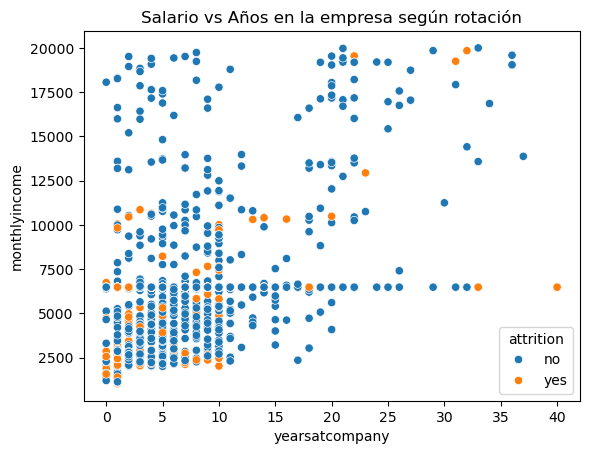

In [ ]:
 # Relación entre salario y años en la empresa, separados por attrition
# Se van los que llevan menos años en la empresa y cobran menos
sns.scatterplot(data=df, x="yearsatcompany", y="monthlyincome", hue="attrition")
plt.title("Salario vs Años en la empresa según rotación")
plt.show()

In [8]:
# Comparar la media de satisfacción laboral
df.groupby("attrition")["jobsatisfaction"].mean().round(2)

attrition
no     2.79
yes    2.49
Name: jobsatisfaction, dtype: float64

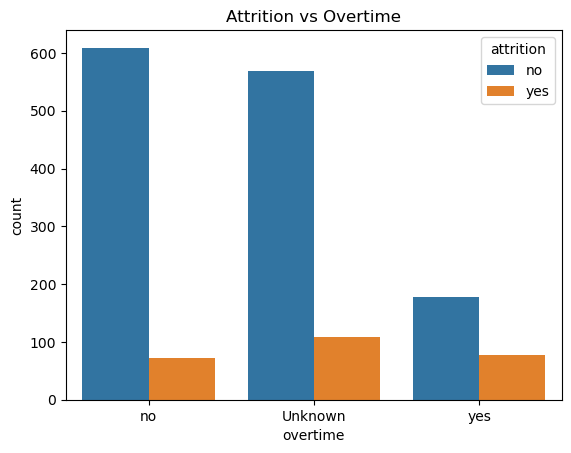

In [10]:
# ¿El exceso de horas extra influye?
sns.countplot(data=df, x='overtime', hue='attrition')
plt.title("Attrition vs Overtime")
plt.show()

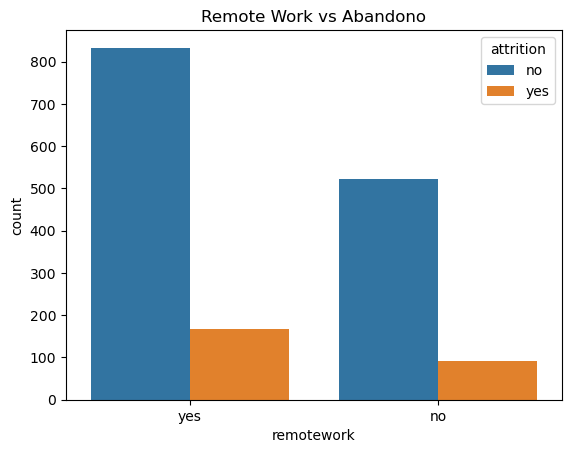

In [12]:
# ¿Afecta el teletrabajo? #Abandonan más los que teletrabajan
sns.countplot(data=df, x='remotework', hue='attrition')
plt.title("Remote Work vs Abandono")
plt.show()

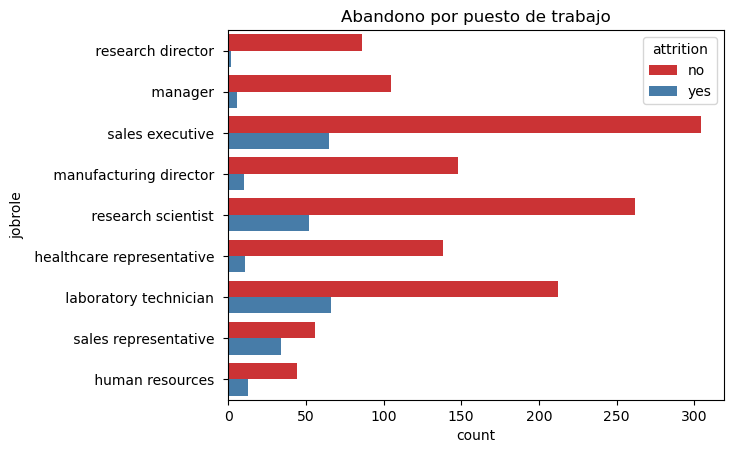

In [19]:
# INTERESANTE
# 1. ¿El abandono está concentrado en ciertos puestos o departamentos?
sns.countplot(data=df, y='jobrole', hue='attrition', palette='Set1')
plt.title("Abandono por puesto de trabajo")
plt.show()

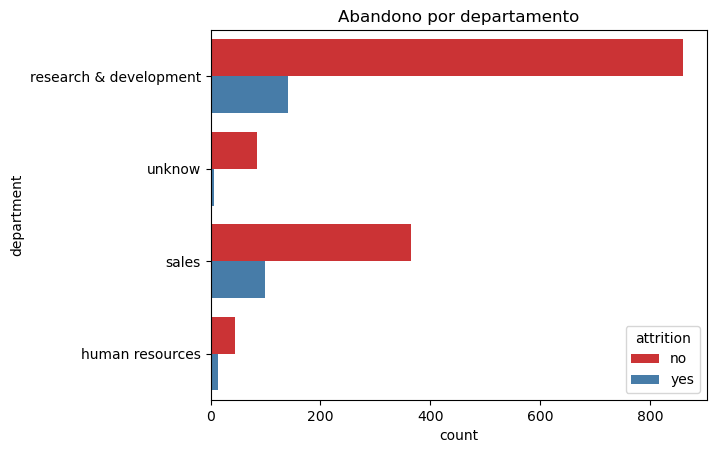

In [21]:
# INTERESANTE: 
# 2.POR DEPARTAMENTO
sns.countplot(data=df, y='department', hue='attrition', palette='Set1')
plt.title("Abandono por departamento")
plt.show()

<Axes: xlabel='attrition', ylabel='environmentsatisfaction'>

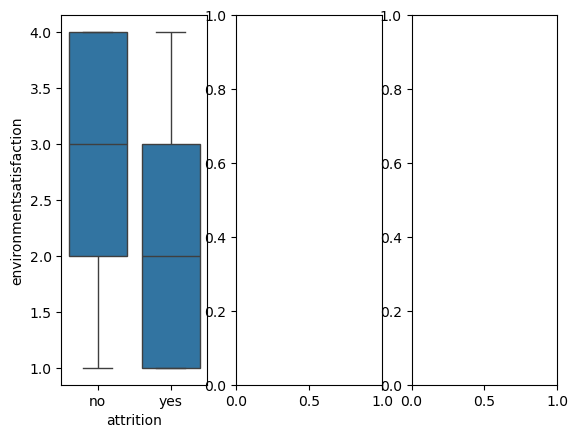

In [23]:
fig, axes = plt.subplots(1, 3)
sns.boxplot(data=df, x='attrition', y='environmentsatisfaction', ax=axes[0])